In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 

In [3]:
dt = pd.read_csv('./Spam Email raw text for NLP.csv')
dt.head(3)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216


In [4]:
messages = dt['MESSAGE']
labels = dt['CATEGORY']

In [5]:
import seaborn as sns

<AxesSubplot: xlabel='CATEGORY', ylabel='count'>

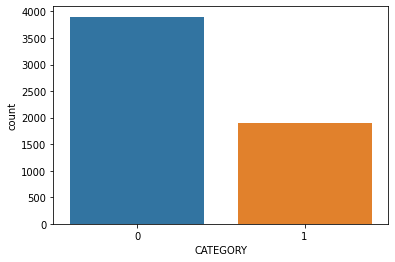

In [6]:
sns.countplot(data=dt, x=dt.CATEGORY)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(messages, labels, test_size=.3, random_state=3)

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
vocab_size = 10000
max_length = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = '---'

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [11]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 10, input_length=max_length),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 10)            100000    
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 16)            816       
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 100,907
Trainable params: 100,907
Non-trainable params: 0
________________________________________________

In [15]:
history = model.fit(training_padded, y_train, epochs=15, validation_data=(testing_padded, y_test))

Epoch 1/15


2023-01-27 02:52:10.409872: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


127/127 [==============================] - 3s 7ms/step - loss: 0.6537 - accuracy: 0.7875 - val_loss: 0.5625 - val_accuracy: 0.8896
Epoch 2/15
127/127 [==============================] - 1s 4ms/step - loss: 0.3638 - accuracy: 0.9322 - val_loss: 0.2048 - val_accuracy: 0.9356
Epoch 3/15
127/127 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9694 - val_loss: 0.1128 - val_accuracy: 0.9620
Epoch 4/15
127/127 [==============================] - 0s 4ms/step - loss: 0.0528 - accuracy: 0.9882 - val_loss: 0.0899 - val_accuracy: 0.9672
Epoch 5/15
127/127 [==============================] - 1s 4ms/step - loss: 0.0259 - accuracy: 0.9968 - val_loss: 0.0853 - val_accuracy: 0.9672
Epoch 6/15
127/127 [==============================] - 1s 4ms/step - loss: 0.0145 - accuracy: 0.9983 - val_loss: 0.0841 - val_accuracy: 0.9678
Epoch 7/15
127/127 [==============================] - 1s 4ms/step - loss: 0.0095 - accuracy: 0.9993 - val_loss: 0.0855 - val_accuracy: 0.9684
Epoch 8/15
127/12